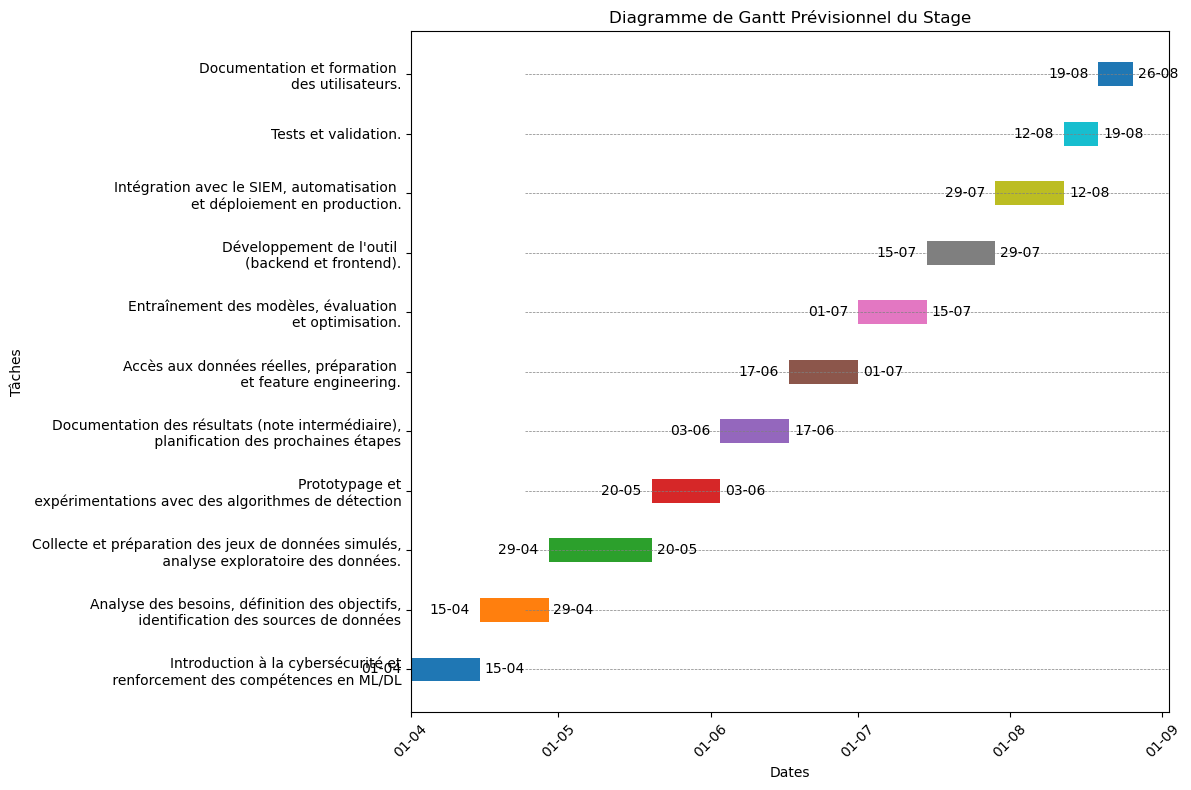

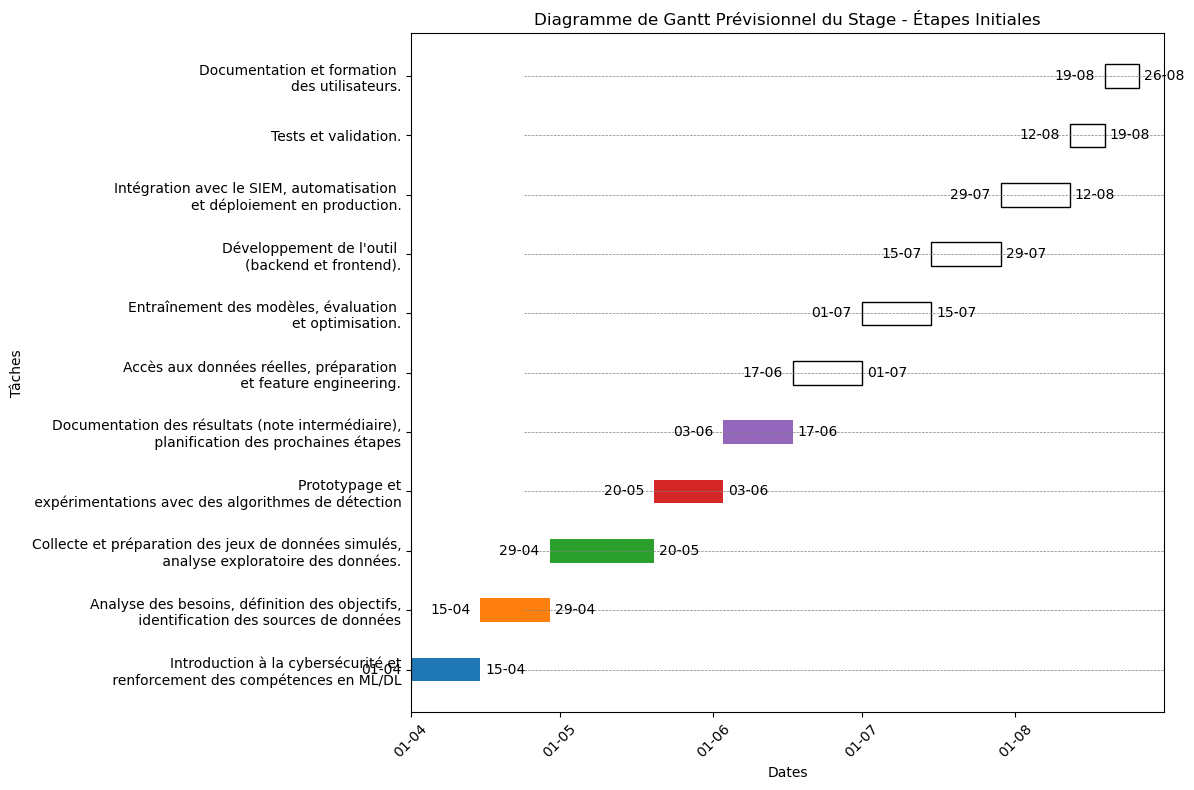

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime

# Préparer les données pour le premier diagramme de Gantt (échelle complète)
data_initial = {
    'Tâche': [
        'Introduction à la cybersécurité et\n renforcement des compétences en ML/DL',
        'Analyse des besoins, définition des objectifs,\n identification des sources de données', 
        'Collecte et préparation des jeux de données simulés,\n analyse exploratoire des données.',
        'Prototypage et\n expérimentations avec des algorithmes de détection',
        'Documentation des résultats (note intermédiaire),\n planification des prochaines étapes',
        'Accès aux données réelles, préparation \n et feature engineering.',
        'Entraînement des modèles, évaluation \net optimisation.',
        'Développement de l\'outil \n(backend et frontend).',
        'Intégration avec le SIEM, automatisation \net déploiement en production.',
        'Tests et validation.',
        'Documentation et formation \ndes utilisateurs.'
    ], 
    'Date de début': [
        '2024-04-01', '2024-04-15', '2024-04-29',
        '2024-05-20', '2024-06-03', '2024-06-17',
        '2024-07-01', '2024-07-15', '2024-07-29',
        '2024-08-12', '2024-08-19'
    ],
    'Durée (jours)': [14, 14, 21, 14, 14, 14, 14, 14, 14, 7, 7]
}

# Convertir les données en DataFrame
df_initial = pd.DataFrame(data_initial)
df_initial['Date de début'] = pd.to_datetime(df_initial['Date de début'])
df_initial['Date de fin'] = pd.to_datetime(df_initial['Date de début']) + pd.to_timedelta(df_initial['Durée (jours)'], unit='d')

# Créer le premier diagramme de Gantt pour l'échelle
fig, ax = plt.subplots(figsize=(12, 8))

for i, (task, start, end) in enumerate(zip(df_initial['Tâche'], df_initial['Date de début'], df_initial['Date de fin'])):
    ax.barh(task, (end - start).days, left=start, height=0.4, align='center')
    ax.text(start - pd.Timedelta(days=2), i, start.strftime('%d-%m'), va='center', ha='right')  # Ajouter la date de début en inversant mois et jour
    ax.text(end + pd.Timedelta(days=1), i, end.strftime('%d-%m'), va='center', ha='left')  # Ajouter la date de fin en inversant mois et jour

# Configurer les axes
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Tâches')
plt.title('Diagramme de Gantt Prévisionnel du Stage')

# Ajouter des lignes discrètes entre le texte et les barres horizontales
for i in range(len(df_initial)):
    ax.axhline(y=i, color='grey', linestyle='--', linewidth=0.5, xmin=0.15)

# Ajuster les marges
plt.tight_layout()
plt.show()

# Préparer les données pour le deuxième diagramme de Gantt (étapes initiales)
data_partial = {
    'Tâche': [
        'Introduction à la cybersécurité et\n renforcement des compétences en ML/DL',
        'Analyse des besoins, définition des objectifs,\n identification des sources de données', 
        'Collecte et préparation des jeux de données simulés,\n analyse exploratoire des données.',
        'Prototypage et\n expérimentations avec des algorithmes de détection',
        'Documentation des résultats (note intermédiaire),\n planification des prochaines étapes',
        'Accès aux données réelles, préparation \n et feature engineering.',
        'Entraînement des modèles, évaluation \net optimisation.',
        'Développement de l\'outil \n(backend et frontend).',
        'Intégration avec le SIEM, automatisation \net déploiement en production.',
        'Tests et validation.',
        'Documentation et formation \ndes utilisateurs.'
    ], 
    'Date de début': [
        '2024-04-01', '2024-04-15', '2024-04-29',
        '2024-05-20', '2024-06-03', '2024-06-17',
        '2024-07-01', '2024-07-15', '2024-07-29',
        '2024-08-12', '2024-08-19'
    ],
    'Durée (jours)': [14, 14, 21, 14, 14, 14, 14, 14, 14, 7, 7]
}

# Convertir les données en DataFrame
df_partial = pd.DataFrame(data_partial)
df_partial['Date de début'] = pd.to_datetime(df_partial['Date de début'])
df_partial['Date de fin'] = df_partial['Date de début'] + pd.to_timedelta(df_partial['Durée (jours)'], unit='d')

# Créer le deuxième diagramme de Gantt à la même échelle
fig, ax = plt.subplots(figsize=(12, 8))

for i, (task, start, end) in enumerate(zip(df_partial['Tâche'], df_partial['Date de début'], df_partial['Date de fin'])):
    if i < 5:  # Colorier les premières 5 barres
        ax.barh(task, (end - start).days, left=start, height=0.4, align='center')
    else:  # Dessiner des barres avec bordure pour les tâches non réalisées
        ax.barh(task, (end - start).days, left=start, height=0.4, align='center', edgecolor='black', fill=False)
    ax.text(start - pd.Timedelta(days=2), i, start.strftime('%d-%m'), va='center', ha='right')  # Ajouter la date de début en inversant mois et jour
    ax.text(end + pd.Timedelta(days=1), i, end.strftime('%d-%m'), va='center', ha='left')  # Ajouter la date de fin en inversant mois et jour

# Configurer les axes pour correspondre à ceux du premier diagramme
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.set_xlim([datetime(2024, 4, 1), datetime(2024, 8, 31)])  # Assurer la même échelle de temps
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Tâches')
plt.title('Diagramme de Gantt Prévisionnel du Stage - Étapes Initiales')

# Ajouter des lignes discrètes entre le texte et les barres horizontales
for i in range(len(df_partial)):
    ax.axhline(y=i, color='grey', linestyle='--', linewidth=0.5, xmin=0.15)

# Ajuster les marges
plt.tight_layout()
plt.show()
